# Exemplo 02 - Mostrar Palavras

In [1]:
from pyspark.sql import SparkSession

In [2]:
spark = SparkSession.\
        builder.\
        appName("pyspark-notebook").\
        master("spark://spark-master:7077").\
        config("spark.executor.memory", "512m").\
        getOrCreate()

In [3]:
sc = spark.sparkContext

In [4]:
# Ler arquivo texto
file_in = sc.textFile('teste.txt')

pyspark.rdd.RDD

In [5]:
# Quantas linhas?
print('Número de linhas no arquivo: %s' % file_in.count())

Número de linhas no arquivo: 8


In [7]:
# Adiciona o operador add
from operator import add

In [8]:
# Contar quantos caracteres
chars = file_in.map(lambda s: len(s)).reduce(add)
print('Número de caracteres no arquivo: %s' % chars)

Número de caracteres no arquivo: 516


In [16]:
# importar o módulo regex
import re

In [17]:
# Contar quantas palavras temos
words = file_in.flatMap(lambda line: re.split('\W+', line.lower().strip()))
# Filtrar apenas as palavras que possuam mais de 3 caracteres
words = words.filter(lambda x: len(x) > 3)
# Fazer com que cada palavra tenha o valor 1
words = words.map(lambda w: (w,1))
# Reduzir para o total
words = words.reduceByKey(add)

In [18]:
words.collect()

[('para', 7),
 ('dados', 2),
 ('alto', 1),
 ('como', 2),
 ('java', 1),
 ('scala', 1),
 ('python', 1),
 ('suporte', 1),
 ('gráficos', 1),
 ('execução', 1),
 ('excelente', 1),
 ('conjunto', 1),
 ('tais', 1),
 ('estruturados', 2),
 ('máquina', 1),
 ('gráfico', 1),
 ('streams', 1),
 ('incremental', 1),
 ('spark', 2),
 ('processamento', 4),
 ('mllib', 1),
 ('aprendizado', 1),
 ('graphx', 1),
 ('computação', 1),
 ('fluxo', 1),
 ('apache', 1),
 ('mecanismo', 2),
 ('análise', 1),
 ('unificado', 1),
 ('grande', 1),
 ('escala', 1),
 ('fornece', 1),
 ('apis', 1),
 ('linguagens', 1),
 ('nível', 1),
 ('permite', 1),
 ('otimizado', 1),
 ('geral', 1),
 ('possui', 1),
 ('ferramentas', 1)]

In [19]:
# Criar uma tupla (count, word) e ordenar de forma ascendente
wordsS = words.map(lambda x:(x[1],x[0])).sortByKey(False)
# Pegar o Top 10
wordsS.take(10)

[(7, 'para'),
 (4, 'processamento'),
 (2, 'dados'),
 (2, 'como'),
 (2, 'estruturados'),
 (2, 'spark'),
 (2, 'mecanismo'),
 (1, 'mllib'),
 (1, 'aprendizado'),
 (1, 'graphx')]

In [ ]:
!pip3 install matplotlib

In [20]:
# Importar a biblioteca necessária
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
# Criar uma função
def histograma(words):
    dados = dict(words)
    y,x = zip(*sorted(zip(dados.values(),[str(i) for i in dados.keys()])))
    plt.barh(x, y, color='g')

In [23]:
# Mudar a ordem (valor, palavra) para (palavra, valor)
wordsF = wordsS.map(lambda x:(x[1], x[0]))
wordsF.take(10)

[('para', 7),
 ('processamento', 4),
 ('dados', 2),
 ('como', 2),
 ('estruturados', 2),
 ('spark', 2),
 ('mecanismo', 2),
 ('mllib', 1),
 ('aprendizado', 1),
 ('graphx', 1)]

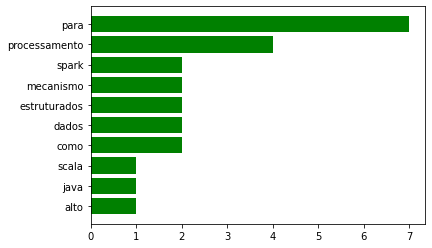

In [24]:
histograma(wordsF.take(10))

In [25]:
spark.sparkContext.stop()